In [1]:
import numpy as np

In [10]:
x = np.array([258,270,294,320,342,368,396,446,480,586])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368,391.2,390.8])

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
p1 = PolynomialFeatures(degree = 2)
p2 = PolynomialFeatures(degree = 3)
p3 = PolynomialFeatures(degree = 4)
x_pl = pl.fit_transform(x)  
x_p2 = p2.fit_transform(x)
x_p3 = p3.fit_transform(x)
#x_p4 = p4.fit_transform(x)

In [39]:
pr = LinearRegression()
pr.fit(x_pl,y)
pr2 = LinearRegression()
pr2.fit(x_p2,y)
pr3 = LinearRegression()
pr3.fit(x_p3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
x_pl

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [41]:
x

array([[258],
       [270],
       [294],
       [320],
       [342],
       [368],
       [396],
       [446],
       [480],
       [586]])

In [42]:
test = np.arange(260,600,2)[:,np.newaxis]

In [50]:
y1 = lr.predict(test)
test1 = p1.fit_transform(test)
y2 = pr.predict(test1)
test2 = p2.fit_transform(test)
y3 = pr2.predict(test2)
test3 = p3.fit_transform(test)
y4 = pr3.predict(test3)

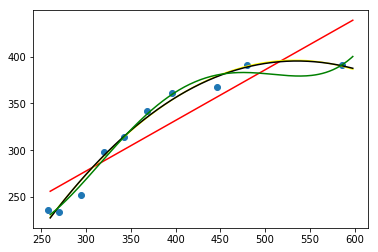

In [51]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(test,y1,c = 'red')
plt.plot(test,y2,c = 'yellow')
plt.plot(test,y3,c = 'black')
plt.plot(test,y4,c = 'green')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
print('Linear:',mean_squared_error(lr.predict(x),y))
print('Polynomial:',mean_squared_error(pr.predict(x_pl) ,y))

Linear: 569.7796663183207
Polynomial: 61.330214517447715


In [33]:
print('accuracy Linear:',r2_score(lr.predict(x),y))
print('accuracy Polynomial',r2_score(pr.predict(x_pl),y))

accuracy Linear: 0.7976511641127627
accuracy Polynomial 0.9815508176225227


## DecisionTree Regression

In [54]:
import pandas as pd
df = pd.read_excel('housing.csv')
df.columns = ['crim','zn','indus','chas','nox','rm','age','dls','rad','tax','ptratio','b',
             'lstat','medv']
a = df[['rm']].values
b = df[['medv']].values

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(a,b)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
z1 = dt.predict(a)

In [64]:
print(mean_squared_error(z1,b))
print(r2_score(z1,b))

4.451719471947195
0.9444442936481255


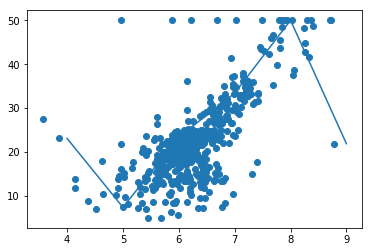

In [65]:
import matplotlib.pyplot as plt
test = np.arange(4,10,1)[:,np.newaxis]
plt.scatter(a,b)
plt.plot(test,dt.predict(test))
plt.show()